Install ucimlrepo

In [60]:
pip install ucimlrepo

Import

In [61]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import numpy as np


Fetch dataset

In [62]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

Spliting data and  Standardize the feature variables

In [63]:
# Preprocessing code for Breast Cancer dataset
# Check for missing values
print("Missing values in each column:\n", X.isnull().sum())

# Check the target class distribution
print("\nTarget class distribution:\n", y.value_counts())

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the feature variables (important for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show the scaled data
print("\nScaled data (first 5 rows of X_train):\n", pd.DataFrame(X_train_scaled, columns=X.columns).head())


Missing values in each column:
 radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

Target class distribution:
 Diagnosis
B            357
M            212
Name: count, dtype: int64

Scaled data (first 5 rows of X_train):
     radius1  texture1  perimeter1     area1  smoothness1  compactness1  \
0  0.518559  0.891826

Exploratory Data Analysis


Summary statistics:
           radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.06492

<ipython-input-64-40b1323db9a0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


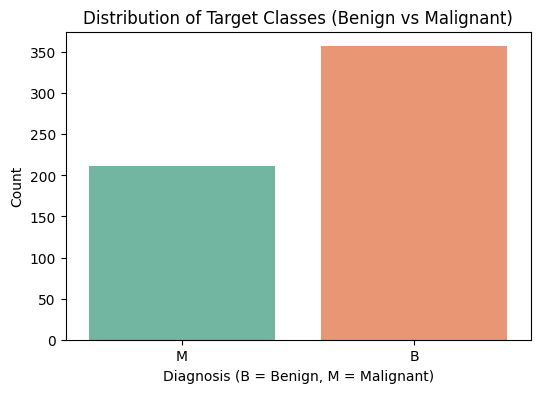

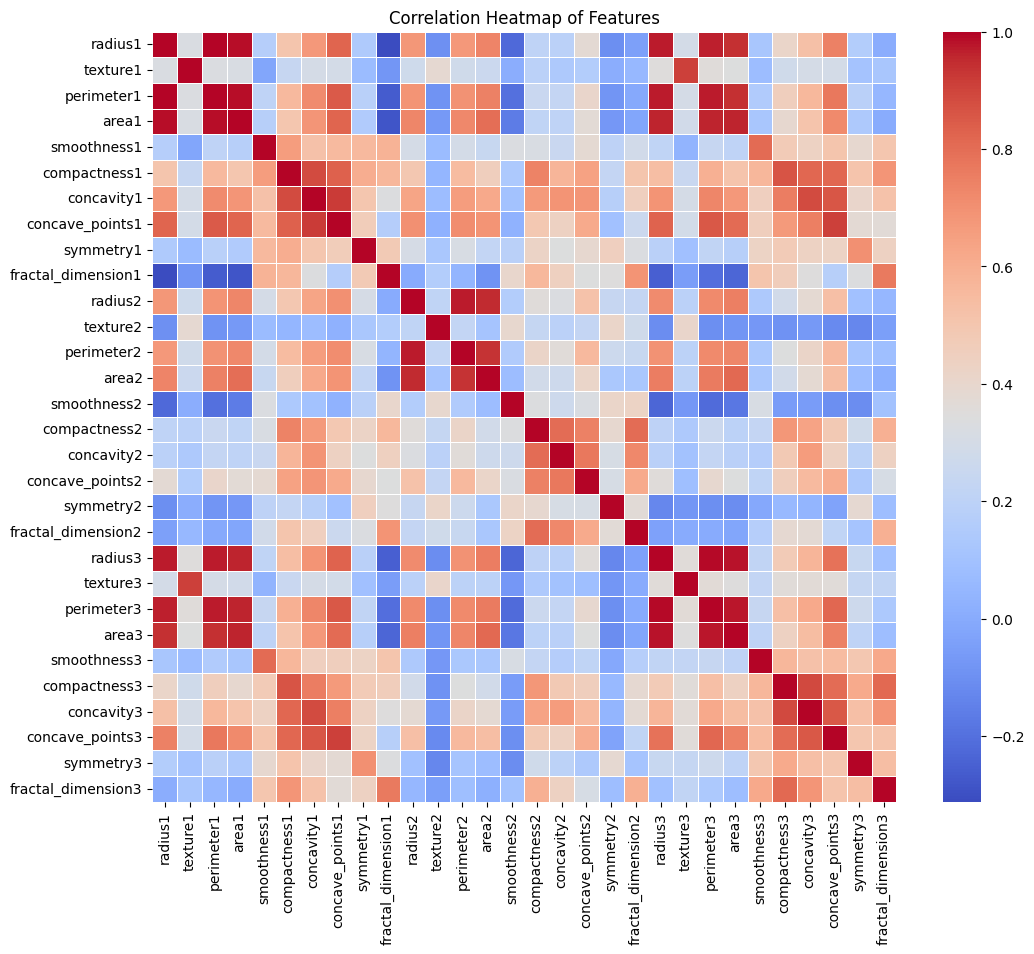

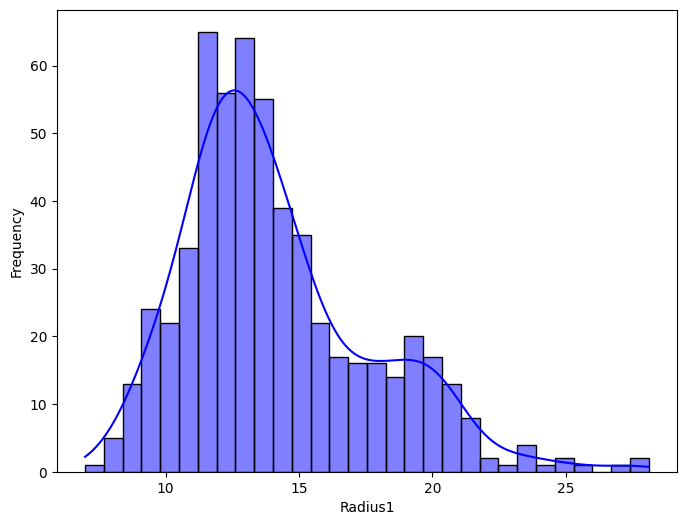

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')


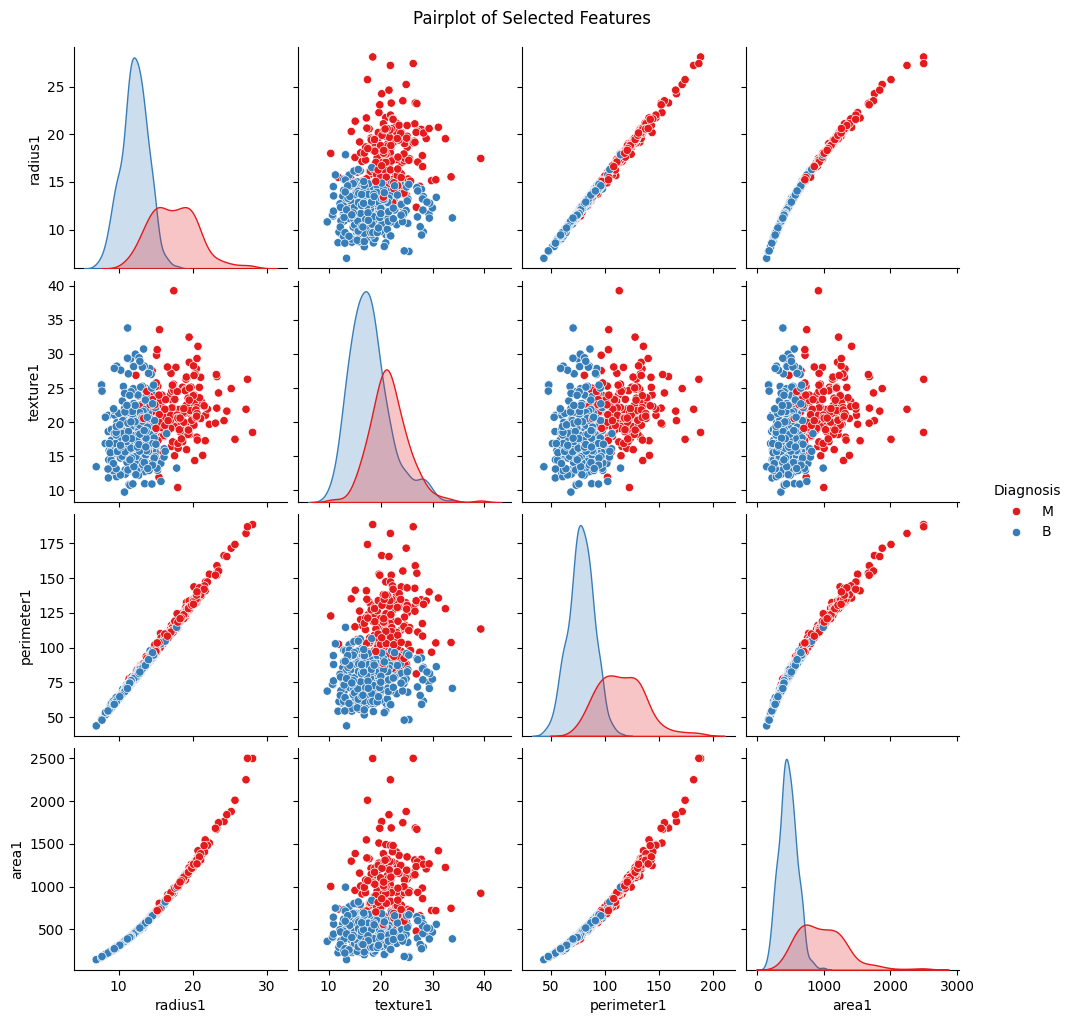

In [64]:

# Ensure y is a pandas Series and has correct values
if isinstance(y, pd.DataFrame):
    y = y.squeeze()
# Display basic statistics for the feature variables
print("\nSummary statistics:\n", X.describe())

# Visualize the distribution of target classes
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="Set2")
plt.title("Distribution of Target Classes (Benign vs Malignant)")
plt.xlabel("Diagnosis (B = Benign, M = Malignant)")
plt.ylabel("Count")
plt.show()

# Correlation heatmap to check relationships between variables
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# Step 1: Visualize the distribution of a key feature (e.g., 'radius1')
plt.figure(figsize=(8, 6))
sns.histplot(X['radius1'], bins=30, kde=True, color='blue')
plt.xlabel("Radius1")
plt.ylabel("Frequency")
plt.show()

# Step 2: Define the features to plot for the pairplot
features_to_plot = ['radius1', 'texture1', 'perimeter1', 'area1']
print(X.columns)

# Step 3: Combine the selected features with the target variable for the pairplot
df_pairplot = X[features_to_plot].join(y.rename("Diagnosis"))

# Step 4: Create a pairplot with the selected features and the 'Diagnosis' target variable
sns.pairplot(df_pairplot, hue='Diagnosis', palette="Set1", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()



 Standardize the feature data

In [65]:

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Display the explained variance of the components
print("Explained Variance per Component:", pca.explained_variance_ratio_)


Explained Variance per Component: [0.44272026 0.18971182]


Plot PCA results

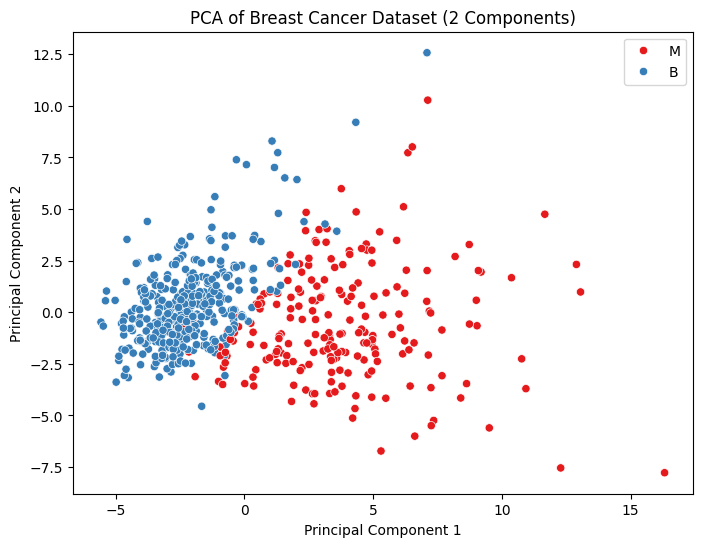

In [66]:

# Create a DataFrame for PCA-transformed data
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Diagnosis'] = y.values

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Diagnosis', data=pca_df, palette='Set1')
plt.title("PCA of Breast Cancer Dataset (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


Initialize and fit Isolation Forest

In [67]:
from scipy.stats import zscore
import numpy as np
import pandas as pd

# Combine features (X_clean) and target (y_clean) for ease of manipulation
data = pd.concat([X_clean, y_clean], axis=1)

# Define a Z-score threshold
threshold = 3

# Compute Z-scores for numeric columns in the dataset
z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))

# Filter rows where all Z-scores are below the threshold
data_clean = data[(z_scores < threshold).all(axis=1)]

# Split the cleaned data back into features and target
X_clean_no_outliers = data_clean.drop(columns=[y_clean.name])  # Replace y_clean.name with the actual target column name
y_clean_no_outliers = data_clean[y_clean.name]


In [68]:

# Initialize and fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(X)

# Retain only inliers (label = 1)
X_clean = X[outlier_labels == 1]
y_clean = y[outlier_labels == 1]

# Train-test split on the cleaned dataset
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)


XGBoost classifier

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Training Accuracy: 0.9537037037037037
Logistic Regression Test Accuracy: 0.9629629629629629

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.88      0.94        34

    accuracy                           0.96       108
   macro avg       0.97      0.94      0.96       108
weighted avg       0.96      0.96      0.96       108



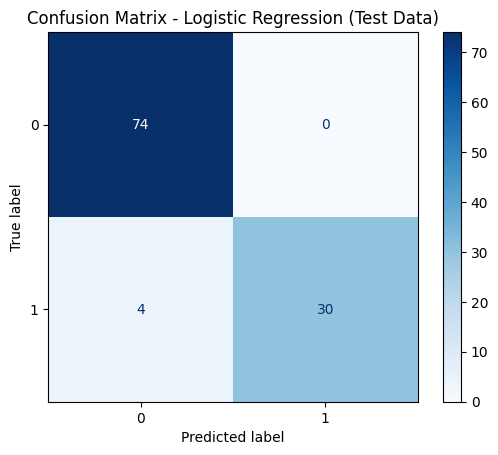

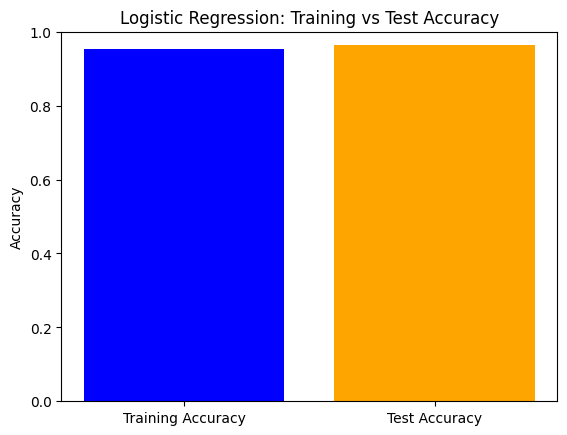

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_clean, y_train_clean)

# Make predictions on both training and test datasets
y_train_pred_log_reg = log_reg.predict(X_train_clean)
y_test_pred_log_reg = log_reg.predict(X_test_clean)

# Evaluate Logistic Regression model
train_accuracy = accuracy_score(y_train_clean, y_train_pred_log_reg)
test_accuracy = accuracy_score(y_test_clean, y_test_pred_log_reg)

print("Logistic Regression Training Accuracy:", train_accuracy)
print("Logistic Regression Test Accuracy:", test_accuracy)
print("\nClassification Report (Test Data):\n", classification_report(y_test_clean, y_test_pred_log_reg))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_clean, y_test_pred_log_reg)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Test Data)")
plt.show()

# Plot Training vs. Test Accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracies = [train_accuracy, test_accuracy]

plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title('Logistic Regression: Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()


Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.9814814814814815

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        74
           1       0.97      0.97      0.97        34

    accuracy                           0.98       108
   macro avg       0.98      0.98      0.98       108
weighted avg       0.98      0.98      0.98       108



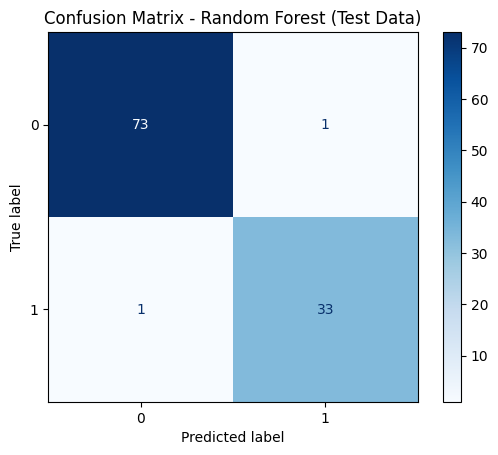

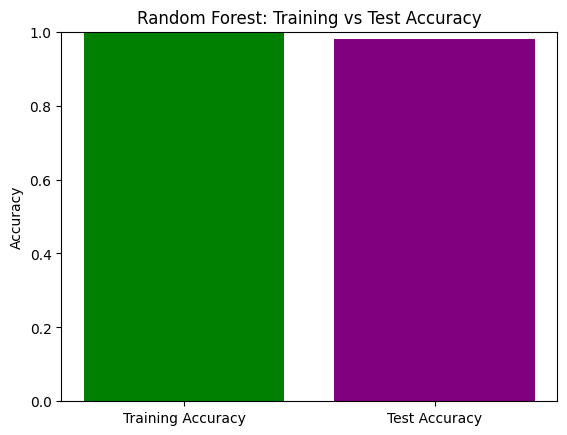

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_clean, y_train_clean)

# Make predictions on both training and test datasets
y_train_pred_rf = rf_model.predict(X_train_clean)
y_test_pred_rf = rf_model.predict(X_test_clean)

# Evaluate Random Forest model
train_accuracy_rf = accuracy_score(y_train_clean, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test_clean, y_test_pred_rf)

print("Random Forest Training Accuracy:", train_accuracy_rf)
print("Random Forest Test Accuracy:", test_accuracy_rf)
print("\nClassification Report (Test Data):\n", classification_report(y_test_clean, y_test_pred_rf))

# Confusion matrix for test data
conf_matrix_rf = confusion_matrix(y_test_clean, y_test_pred_rf)

# Plot Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest (Test Data)")
plt.show()

# Plot Training vs. Test Accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracies_rf = [train_accuracy_rf, test_accuracy_rf]

plt.bar(labels, accuracies_rf, color=['green', 'purple'])
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title('Random Forest: Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()


XGBoost Accuracy: 0.9537037037037037
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        74
           1       0.91      0.94      0.93        34

    accuracy                           0.95       108
   macro avg       0.94      0.95      0.95       108
weighted avg       0.95      0.95      0.95       108

XGBoost Training Accuracy: 1.0
XGBoost Test Accuracy: 0.9537037037037037

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.97      0.96      0.97        74
           1       0.91      0.94      0.93        34

    accuracy                           0.95       108
   macro avg       0.94      0.95      0.95       108
weighted avg       0.95      0.95      0.95       108



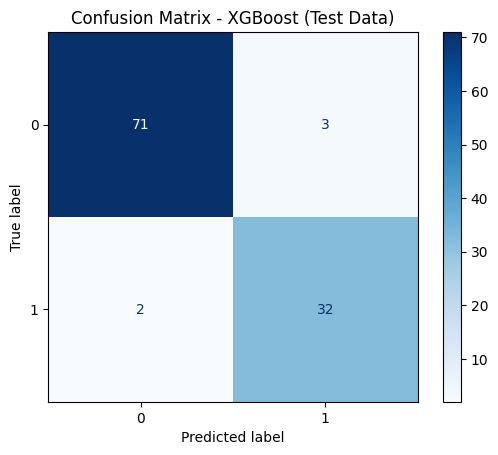

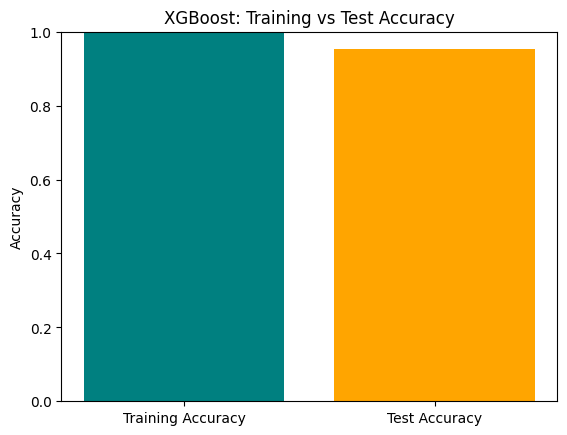

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import numpy as np


# Assuming X_clean and y_clean are preprocessed and cleaned
# Convert data into training and testing sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

# Ensure y is encoded numerically (if not already)
y_train_clean = y_train_clean.map({'M': 1, 'B': 0})
y_test_clean = y_test_clean.map({'M': 1, 'B': 0})

# Convert data into NumPy arrays
X_train_clean = np.array(X_train_clean)
X_test_clean = np.array(X_test_clean)
y_train_clean = np.array(y_train_clean)
y_test_clean = np.array(y_test_clean)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_clean)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test_clean, y_pred_xgb))
print(classification_report(y_test_clean, y_pred_xgb))


# Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_clean, y_train_clean)

# Make predictions on both training and test datasets
y_train_pred_xgb = xgb_model.predict(X_train_clean)
y_test_pred_xgb = xgb_model.predict(X_test_clean)

# Evaluate the XGBoost model
train_accuracy_xgb = accuracy_score(y_train_clean, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test_clean, y_test_pred_xgb)

print("XGBoost Training Accuracy:", train_accuracy_xgb)
print("XGBoost Test Accuracy:", test_accuracy_xgb)
print("\nClassification Report (Test Data):\n", classification_report(y_test_clean, y_test_pred_xgb))

# Confusion matrix for test data
conf_matrix_xgb = confusion_matrix(y_test_clean, y_test_pred_xgb)

# Plot Confusion Matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot(cmap="Blues")
plt.title("Confusion Matrix - XGBoost (Test Data)")
plt.show()

# Plot Training vs. Test Accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracies_xgb = [train_accuracy_xgb, test_accuracy_xgb]

plt.bar(labels, accuracies_xgb, color=['teal', 'orange'])
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title('XGBoost: Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()
